### Import Library

In [1]:
import os
import shutil
import sys

from formula import *
import json_function as fjson
import processing as proc
from graph import *
from post_process import *
import internal_factor as infac

import training_data as train

### Define Global Variable

In [2]:
data_path = "E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/data training 74hc4051"
folder_name = ["data training/"]
folder_path = folder_name.copy()

fstart = 20e3
fend = 50e3

# Main Program

### Data Training Folder Conditioning

In [3]:
folder_data_training_name = train.detect_folder_data_training(data_path)
train.copy_all_files_to_data_training_folder(data_path, folder_data_training_name)

### Considering Internal Factor

In [4]:
internal_flag = infac.choose_internal_flag()

if internal_flag: infac.get_internal_factor(data_path, file_path="tmp/training_internal_factor.json")


Initialize tmp/training_internal_factor.json ... Done


Writing tmp/training_internal_factor.json ... Done


In [5]:
# start
# replace path_value in folder_path
i = 0
for f in folder_path:
    folder_path[i] = os.path.join(data_path, f)
    i += 1

# prepare tmp files
fjson.initialize_training_tmp_files()

Initialize tmp files ... Done


In [6]:
# process analysis
idx = 0
folder_path_i = folder_path[idx]

print("\nProcessing %s ..." %folder_name[idx])

# preprocessing
files, dfs, dfs_list = proc.prepare_data(folder_path[idx])
if internal_flag:
    dfs_list = proc.create_actual_params_columns(dfs_list, file_path="tmp/training_internal_factor.json")
variation_str, variation_data = train.preprocessing_data_training(files)
saved_dirname = proc.prepare_result_folder(data_path)

iteration = len(dfs_list) // len(variation_data)

# main processing
# process_analysis(folder_path[idx], variation_data, dfs_list, iteration)

print("files: %s\n" %files)
print("variation_str: %s\n" %variation_str)
print("variation_data: %s\n" %variation_data)
print("saved_dirname: %s\n" %saved_dirname)


Processing data training/ ...
files: ['1007ohm (1).csv', '1007ohm (2).csv', '1007ohm (3).csv', '1007ohm (4).csv', '1007ohm (5).csv', '1106ohm (1).csv', '1106ohm (2).csv', '1106ohm (3).csv', '1106ohm (4).csv', '1106ohm (5).csv', '1207ohm (1).csv', '1207ohm (2).csv', '1207ohm (3).csv', '1207ohm (4).csv', '1207ohm (5).csv', '1334ohm (1).csv', '1334ohm (2).csv', '1334ohm (3).csv', '1334ohm (4).csv', '1334ohm (5).csv', '1471ohm (1).csv', '1471ohm (2).csv', '1471ohm (3).csv', '1471ohm (4).csv', '1471ohm (5).csv', '1570ohm (1).csv', '1570ohm (2).csv', '1570ohm (3).csv', '1570ohm (4).csv', '1570ohm (5).csv', '1669ohm (1).csv', '1669ohm (2).csv', '1669ohm (3).csv', '1669ohm (4).csv', '1669ohm (5).csv', '1739ohm (1).csv', '1739ohm (2).csv', '1739ohm (3).csv', '1739ohm (4).csv', '1739ohm (5).csv', '198.6ohm (1).csv', '198.6ohm (2).csv', '198.6ohm (3).csv', '198.6ohm (4).csv', '198.6ohm (5).csv', '1982ohm (1).csv', '1982ohm (2).csv', '1982ohm (3).csv', '1982ohm (4).csv', '1982ohm (5).csv', '2176o

### Main Processing

In [7]:
def process_analysis(folder_path_i, variation_str, dfs_list, iteration):
    saved_dirname = proc.prepare_result_folder(data_path)

    # plot & save figure
    # proc.build_graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname, internal_flag)
    
    
    # get z_mid & phase_mid from every dataframe. data_mid is data at fmid
    # arr = [[...], [...], ...]
    arr_z_mid, arr_phase_mid, dfs_list = proc.get_data_mid(dfs_list, iteration, internal_flag)
    
    # every variation have n dataframes. n = num_of_iteration
    # build single dataframe for every variation by averaging them (from data repetisi)
    # length of df_choosen is same with num_of_variation
    df_choosen = proc.build_df_choosen(dfs_list, iteration)


    # plot & save figure
    proc.build_single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname, internal_flag)

    # store measurement data as reference value
    arr_z_ref, arr_phase_ref = train.get_data_ref(variation_data)

    # store data_avg of parameter: z, phase. Stored to variation_json
    arr_z_avg, arr_phase_avg = proc.get_z_phase_avg_from_df_choosen(df_choosen, internal_flag)

    # calculate error of z and phase
    arr_z_err = train.get_arr_err(arr_z_ref, arr_z_avg)
    arr_phase_err = train.get_arr_err(arr_phase_ref, arr_phase_avg)       # if using phase_ref = 0, its error will be INFINITY

    # update json file data
    proc.update_overview_json(folder_name, fstart, fend, files, iteration, variation_str, 
                                file_path="tmp/training_overview.json")
    train.update_training_variation_json(variation_str,
                                    arr_z_ref, arr_phase_ref,
                                    arr_z_mid, arr_phase_mid,
                                    arr_z_avg, arr_phase_avg,
                                    arr_z_err, arr_phase_err)

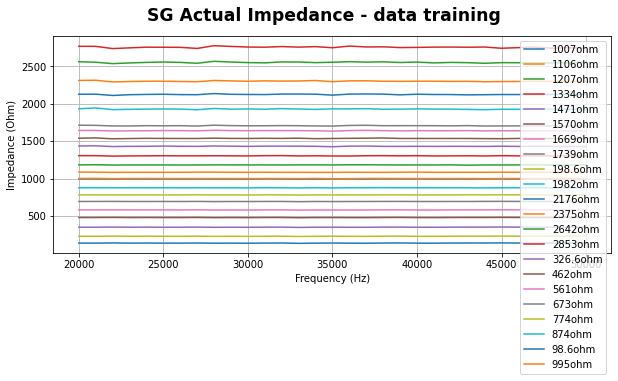

Saving SG Actual Impedance - data training ... Done


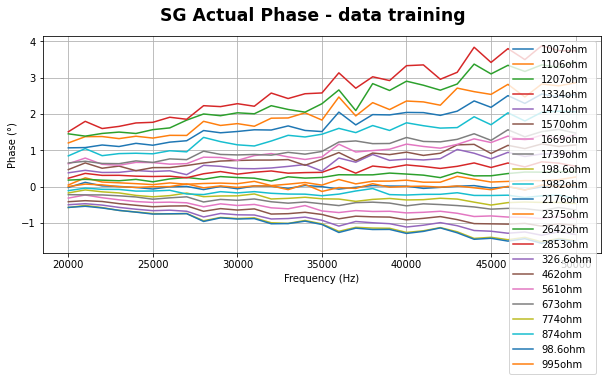

Saving SG Actual Phase - data training ... Done
Writing tmp/training_overview.json ... Done
Writing tmp/training_variation.json ... Done


In [8]:
process_analysis(folder_path[idx], variation_str, dfs_list, iteration)

### Post Processing

In [9]:
# change filename if considering internal factor
fn1, fn2 = train.naming_conditioning_for_image_and_markdown(internal_flag)

In [10]:
# create dataframe from final file_variation.json
header = ["variation", "z_ref", "z_avg", "%z", "\u03C6_ref", "\u03C6_avg", "%\u03C6"]
data_key = ["variation", "z_ref", "z_avg", "z_err", "phase_ref", "phase_avg", "phase_err"]
df_z_phase = proc.build_df_from_file_json(header, data_key, file_path="tmp/training_variation.json")

In [11]:
df_z_phase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   variation  22 non-null     object
 1   z_ref      22 non-null     object
 2   z_avg      22 non-null     object
 3   %z         22 non-null     object
 4   φ_ref      22 non-null     int64 
 5   φ_avg      22 non-null     object
 6   %φ         22 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.4+ KB


In [12]:
train.create_markdown_table_from_dataframe(df_z_phase, filename=fn1, saved_dirname=saved_dirname)

Build table in TB Actual Impedance Phase.md ... Done


### Plot %Z vs Z_ref

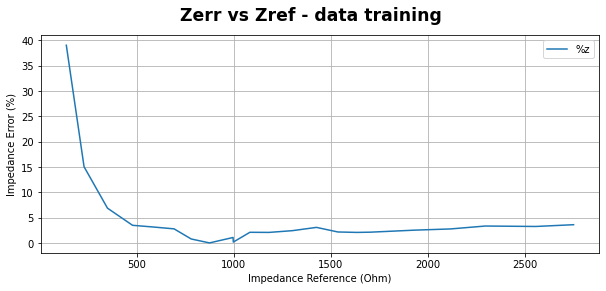

Saving Zerr vs Zref - data training ... Done


In [26]:
graph_relation_Zerr_and_R(df_z_phase, folder_path_i, saved_dirname,
                                x_data="z_avg", y_data="%z",
                                x_label="Impedance Reference (Ohm)", y_label="Impedance Error (%)",
                                suptitle_prefix="Zerr vs Zref")

### Plot Z_avg vs Z_ref

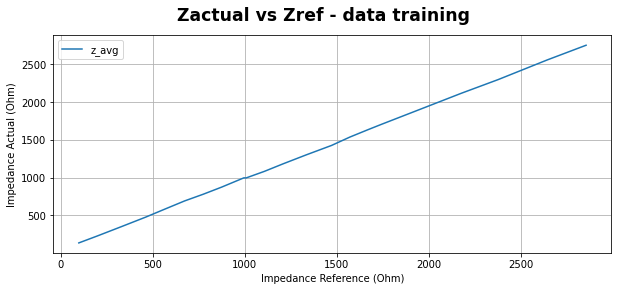

Saving Zactual vs Zref - data training ... Done


In [14]:
graph_relation_Zerr_and_R(df_z_phase, folder_path_i, saved_dirname,
                                x_data="z_ref", y_data="z_avg",
                                x_label="Impedance Reference (Ohm)", y_label="Impedance Actual (Ohm)",
                                suptitle_prefix="Zactual vs Zref")

### Build Model

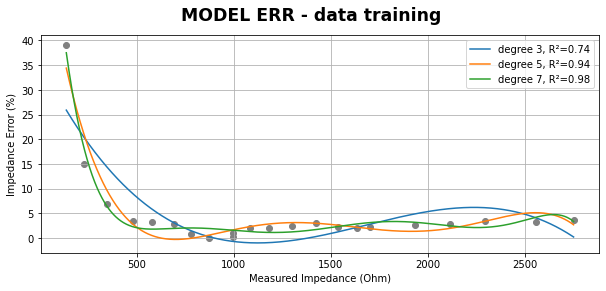

Saving MODEL ERR - data training ... Done
model_coef:
[-1.4671117332174635e-20, 1.5897327778633555e-16, -7.030953843535029e-13, 1.635071752870189e-09, -2.1465948363184766e-06, 0.0015848476436242846, -0.6091839550966541, 96.2224586231823]


In [20]:
model_obj = build_graph_and_model(df_z_phase, folder_path_i, saved_dirname, degree_arr=[3, 5, 7],
                                    x_data="z_avg", y_data="%z",
                                    x_label="Measured Impedance (Ohm)", y_label="Impedance Error (%)",
                                    suptitle_prefix="MODEL ERR")

print("model_coef:")
print(model_obj["model_3"]["model_coef"])

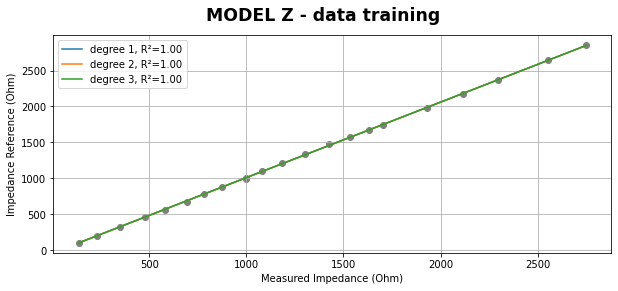

Saving MODEL Z - data training ... Done
model_coef:
[1.0522554698971198, -43.976637056098205]


In [25]:
model_obj = build_graph_and_model(df_z_phase, folder_path_i, saved_dirname, degree_arr=[1],
                                    x_data="z_avg", y_data="z_ref",
                                    x_label="Measured Impedance (Ohm)", y_label="Impedance Reference (Ohm)",
                                    suptitle_prefix="MODEL Z")

print("model_coef:")
print(model_obj["model_1"]["model_coef"])

### Use the model to calculate Z_actual

Then compare the error before and after use model

In [17]:
df_z_phase

,variation,z_ref,z_avg,%z,φ_ref,φ_avg,%φ
0,1007ohm,1007.000000,995.786011,1.114000,0,0.002,inf
1,1106ohm,1106.000000,1082.368042,2.137000,0,0.045,inf
2,1207ohm,1207.000000,1181.459961,2.116000,0,0.255,inf
3,1334ohm,1334.000000,1301.192993,2.459000,0,0.396,inf
4,1471ohm,1471.000000,1425.328979,3.105000,0,0.431,inf
5,1570ohm,1570.000000,1535.465942,2.200000,0,0.756,inf
6,1669ohm,1669.000000,1633.694946,2.115000,0,0.820,inf
7,1739ohm,1739.000000,1701.449951,2.159000,0,0.971,inf
8,198.6ohm,198.600006,228.507996,15.059000,0,-1.022,inf
9,1982ohm,1982.000000,1931.234009,2.561000,0,1.444,inf


### Choose best model

In [23]:
def choose_best_model(model_obj):
    r_square_tmp = 0
    model_coef_tmp = []
    for val in model_obj.values():
        if val["r_square"] > r_square_tmp:
            r_square_tmp = val["r_square"]
            model_coef_tmp = val["model_coef"]
    
    return model_coef_tmp, r_square_tmp


best_model_coef, best_r_square = choose_best_model(model_obj)
print(best_model_coef, best_r_square, sep="\n\n")

[1.0522554698971198, -43.976637056098205]

0.9999235193789675


In [24]:
def get_z_model(df, model_coef, var_in="z_avg", var_out="z_model", var_ref="z_ref"):
    # create new column to store z_actual
    df[var_out] = 0

    for i in range(len(df)):
        # get the z_value
        val_avg = df[var_in][i]
        val_ref = df[var_ref][i]

        # use the model to get z_actual from z_value
        val_model = 0      # result for z_avg
        for j in range(len(model_coef)):
            coef = model_coef[j]
            degree = len(model_coef)-1 - j

            val_model += coef * (val_avg ** degree)
            # print(degree, coef, z_avg, result, sep="\t")
        
        # asign z_model to dataframe
        df.loc[i, var_out] = val_model
        # asign %z_model to dataframe
        df.loc[i, str("%" + var_out)] = calculate_error(val_ref, val_model)

    df = df.sort_values(by=[var_in], ascending=True, ignore_index=True)
    return df

    
df_z_phase = get_z_model(df_z_phase, best_model_coef)
df_z_phase

,variation,z_ref,z_avg,%z,φ_ref,φ_avg,%φ,z_model,%z_model
0,98.6ohm,98.599998,137.084000,39.030998,0,-1.039,inf,100.270751,1.694476
1,198.6ohm,198.600006,228.507996,15.059000,0,-1.022,inf,196.472151,1.071427
2,326.6ohm,326.600006,349.118011,6.895000,0,-0.924,inf,323.384700,0.984478
3,462ohm,462.000000,478.242004,3.515000,0,-0.763,inf,459.256128,0.593912
4,561ohm,561.000000,578.950989,3.200000,0,-0.666,inf,565.227708,0.753602
5,673ohm,673.000000,691.950989,2.816000,0,-0.470,inf,684.132576,1.654172
6,774ohm,774.000000,780.322021,0.817000,0,-0.332,inf,777.121478,0.403292
7,874ohm,874.000000,874.362976,0.042000,0,-0.247,inf,876.076587,0.237596
8,1007ohm,1007.000000,995.786011,1.114000,0,0.002,inf,1003.844640,0.313343
9,995ohm,995.000000,997.077026,0.209000,0,-0.130,inf,1005.203118,1.025439
